<a href="https://colab.research.google.com/github/priyajain220891/Data_analyst_projects/blob/main/Hypothesis_Testing_for_Cycle_Demand_Analysis%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link:https://colab.research.google.com/drive/1KyOcHvt_oegeHj-PxqiFiBFQpN33fBUO

# **Hypothesis Testing for Cycle Demand Analysis**

# **1.Define Problem Statement and perform Exploratory Data Analysis**

# **Business Problem:-**
Micro-Mobility Ventures, a key player in India's micro-mobility sector, is addressing declining revenues. Through data analysis and hypothesis testing, the company aims to identify vital factors influencing shared electric cycle demand. This analysis will guide strategic decisions, improving operations and revenue.












# **About Dataset:**
The dataset provides information on a micro-mobility service, presenting attributes like date, time, season, holiday and working day status, weather conditions, temperature, humidity, wind speed, and user counts (casual, registered, and total). Its purpose is to analyze factors influencing the demand for shared electric cycles in the Indian market. The objective is to facilitate data-driven decision-making for addressing declining revenues and optimizing operations in this micro-mobility service.






# **import all important file**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm




# **Read the data set**

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# **Analyzing basic metrics about dataset**

In [ ]:
#shape(rows,column)
print("rows:",df.shape[0],"column:",df.shape[1])

rows: 10886 column: 12


In [ ]:
# totle number of elements
df.size

130632

In [ ]:
#Data types of column
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
#columns_name
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **Conversion of data type**

Datatype of following attributes needs to change to proper data type

. datetime - to datetime

. season - to categorical

. holiday - to categorical

.workingday - to categorical

.weather - to categorical

In [ ]:
import datetime
# conversion of data types of columns
column=["season","holiday","workingday","weather"]
df[column]=df[column].astype("object")
df["datetime"]=pd.to_datetime(df["datetime"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#statistical summary
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include="all")

<ipython-input-200-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [ ]:
df.describe(include="object")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
#finding unique values in columns
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [ ]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


there are no duplicate values in dataset

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **Dataset ovservation:**


The dataset has 10,886 rows and 12 columns.

It includes information about bike sharing, like date and time, weather, and user counts.

Data types were adjusted for better analysis:

"datetime" was changed to date and time format.
"season," "holiday," "workingday," and "weather" were changed to represent categories.
There are no duplicate values in the dataset.




In [ ]:
df.groupby("season")["count","humidity","registered","casual"].mean()

<ipython-input-206-25ab5266e45b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("season")["count","humidity","registered","casual"].mean()


,count,humidity,registered,casual
season,,,,
1,116.343261,56.297841,100.853686,15.489576
2,215.251372,60.852909,167.804610,47.446762
3,234.417124,64.123674,182.196853,52.220271
4,198.988296,66.173738,170.407462,28.580834


# **Non-Graphical Analysis: Value counts and unique attributes and min and max**​

In [ ]:
#for categorical data
cat_cols=["season","holiday","workingday","weather"]
# number of unique values in each categorical columns
print(df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count())
print("min",df[cat_cols].min())
print("max",df[cat_cols].max())

                  value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412
min season        1
holiday       0
workingday    0
weather       1
dtype: object
max season        4
holiday       1
workingday    1
weather       4
dtype: object


In [ ]:
#for numerical data
num_cols=["temp","atemp","humidity","windspeed","casual","registered","count"]
# number of unique values in each numerical columns
print(df[num_cols].melt().groupby(['variable', 'value'])[['value']].count())
print("min:",df[num_cols].min())
print("max:",df[num_cols].max())


                   value
variable  value         
atemp     0.7600       2
          1.5150       1
          2.2750       7
          3.0300       7
          3.7900      16
...                  ...
windspeed 46.0022      3
          47.9988      2
          50.0021      1
          51.9987      1
          56.9969      2

[2088 rows x 1 columns]
min: temp          0.82
atemp         0.76
humidity      0.00
windspeed     0.00
casual        0.00
registered    0.00
count         1.00
dtype: float64
max: temp           41.0000
atemp          45.4550
humidity      100.0000
windspeed      56.9969
casual        367.0000
registered    886.0000
count         977.0000
dtype: float64


# **Data ovservation by Non-Graphical Analysis: Value counts and unique attributes ​**

Based on the non-graphical analysis of the dataset attributes using the provided function "Unique," here are the observations for various attributes:

1. datetime:
   - Unique values: All values are unique because it represents different timestamps.
   - Unique values count: 10886 (total number of timestamps).
   - Min: 2011-01-01 00:00:00 (earliest timestamp).
   - Max: 2012-12-19 23:00:00 (latest timestamp).

2. season:
   - Unique values: [1, 2, 3, 4]
   - Unique values count: 4 (representing four different seasons).

3. holiday:
   - Unique values: [0, 1]
   - Unique values count: 2 (indicating either a holiday or not).
   - Min: 0 (non-holiday).
   - Max: 1 (holiday).

4. workingday:
   - Unique values: [1, 0]
   - Unique values count: 2 (representing working day or non-working day).
   - Min: 0 (non-working day).
   - Max: 1 (working day).

5. weather:
   - Unique values: [1, 2, 3, 4]
   - Unique values count: 4 (representing different weather conditions).

6. temp, atemp,humidity,windspeed,casual,registered,and count:
   - These attributes provide information on temperature, feeling temperature, humidity, wind speed, and user counts.
   - The min and max values vary depending on the specific attribute.

These observations provide details about the unique values, counts, and the minimum and maximum values for each attribute.

# **Visual Analysis:**

# **Missing Value & Outlier Detection:**

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**insights:-** There are no null values in dataset.

# **Finding outliers using Boxplot**

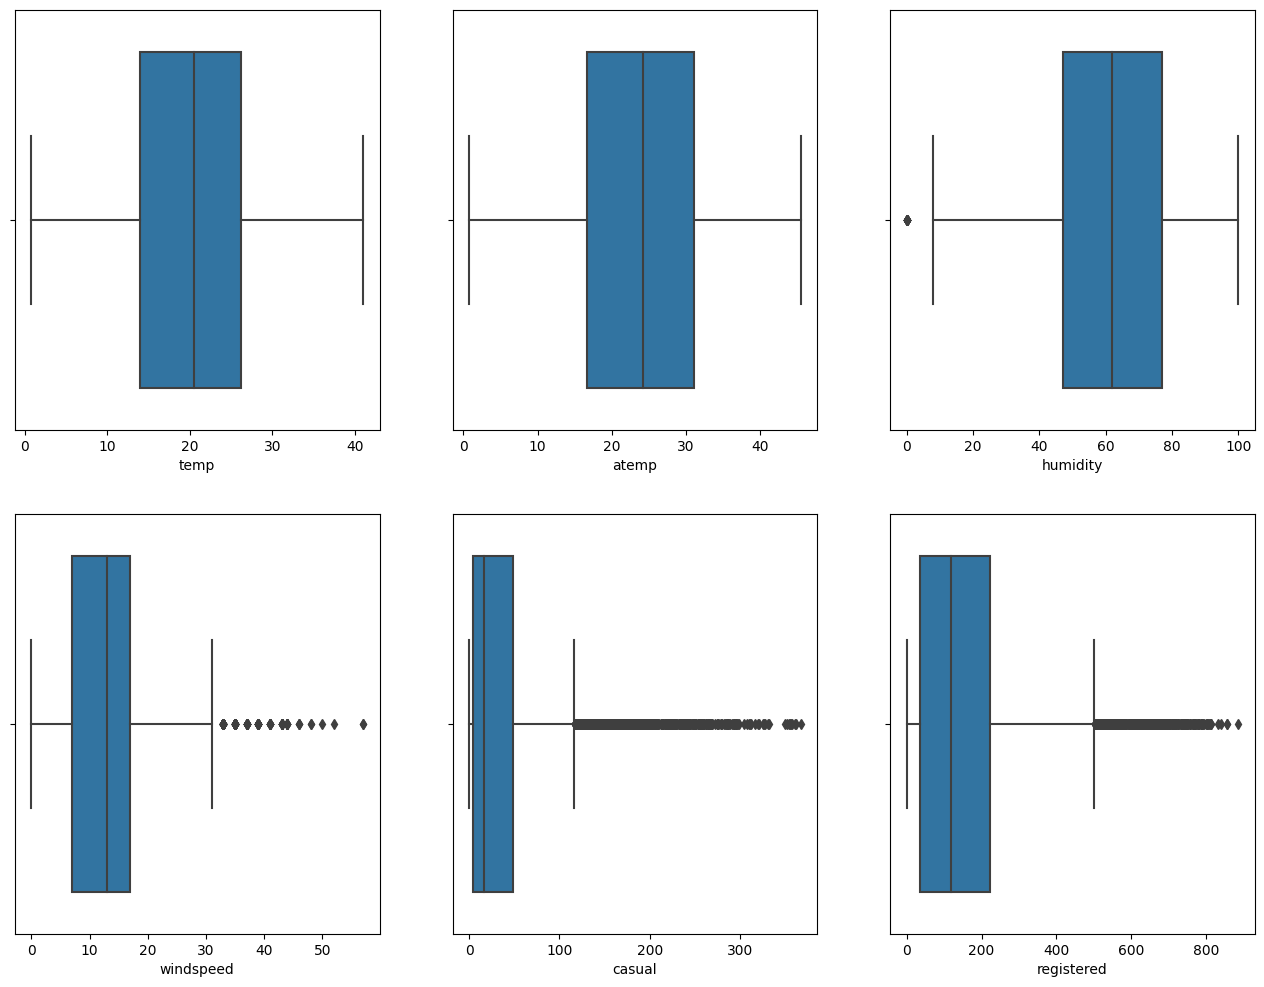

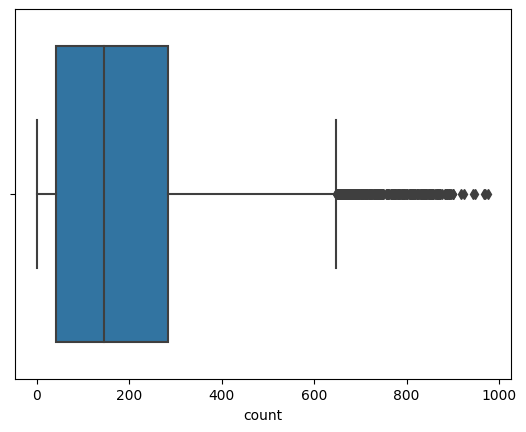

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
 for col in range(3):
  sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
  index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

**Insights:** according to the graphical representation windspeed,casual,registered,count attributes have major outliers and humidity has minor outliers and temp and atemp has no outliers


**Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)**

## **Univariate Analysis:**

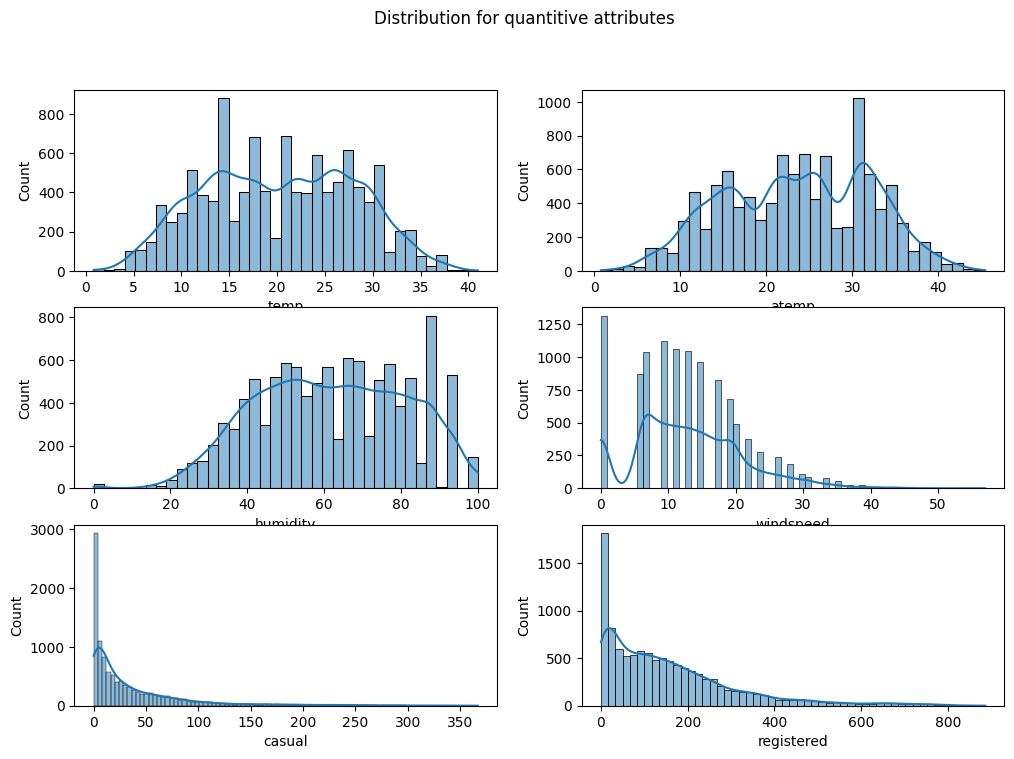

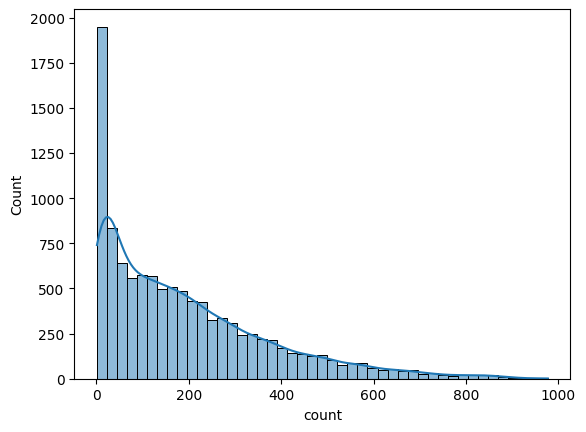

In [ ]:
# Distribution for quantitive attributes
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']
fig, axis = plt.subplots(nrows=3 ,ncols=2, figsize=(12, 8))
fig.suptitle("Distribution for quantitive attributes")
index = 0
for row in range(3):
 for col in range(2):
  sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
  index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

**1. Temperature (`temp` and `atemp`):** The distributions are bell-shaped and symmetric, similar to a normal distribution. Most values cluster around the mean temperature, indicating a balanced spread of temperatures.

**2. Humidity (`humidity`):**The distribution is right-skewed, with a tail on the higher humidity values. This suggests that higher humidity levels are more common, and there are fewer instances of low humidity.

**3. Wind Speed (`windspeed`):** The distribution is also right-skewed, with a peak at lower wind speeds. However, there are occasional days with much higher wind speeds, creating a right-skewed tail.

**4. User Counts (`casual`, `registered`, and `count`):** All these distributions are right-skewed, indicating that most days have relatively lower bike rental counts. However, there are some days with significantly higher rental counts, causing the right-skewed shape.

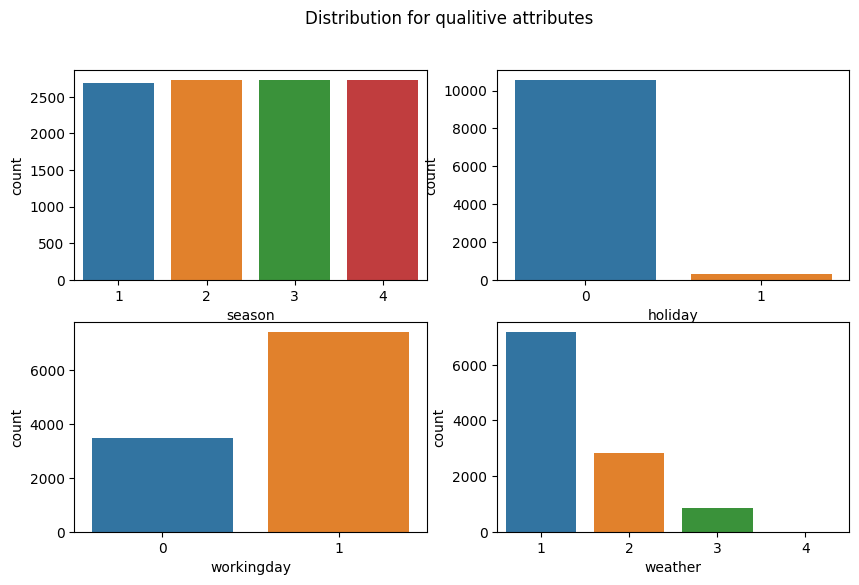

In [ ]:
# Distribution for qualitive attributes
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle("Distribution for qualitive attributes")
index = 0
for row in range(2):
 for col in range(2):
  sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
  index += 1

plt.show()


**insights:**
1. **Season:**
   - The count plot for seasons shows that each season category (spring, summer, fall, and winter) has a roughly similar number of occurrences.
   - This suggests that the dataset is well-distributed across the four seasons, and there is no significant imbalance.

2. **Holiday:**
   - The count plot for holidays indicates that the dataset predominantly contains non-holiday data (holiday=0).
   - There are significantly fewer instances of holiday data (holiday=1) compared to non-holiday days.

3. **Working Day:**
   - The count plot for working days shows that there are more instances of working days (workingday=1) compared to non-working days (workingday=0).
   - This suggests that the dataset contains a higher proportion of data from regular working days.

4. **Weather:**
   - The count plot for weather conditions (1, 2, 3, 4) reveals that the majority of the dataset corresponds to clear or slightly cloudy weather (weather=1).
   - Other weather conditions (mist, rain, thunderstorm, and snow) have significantly fewer occurrences.



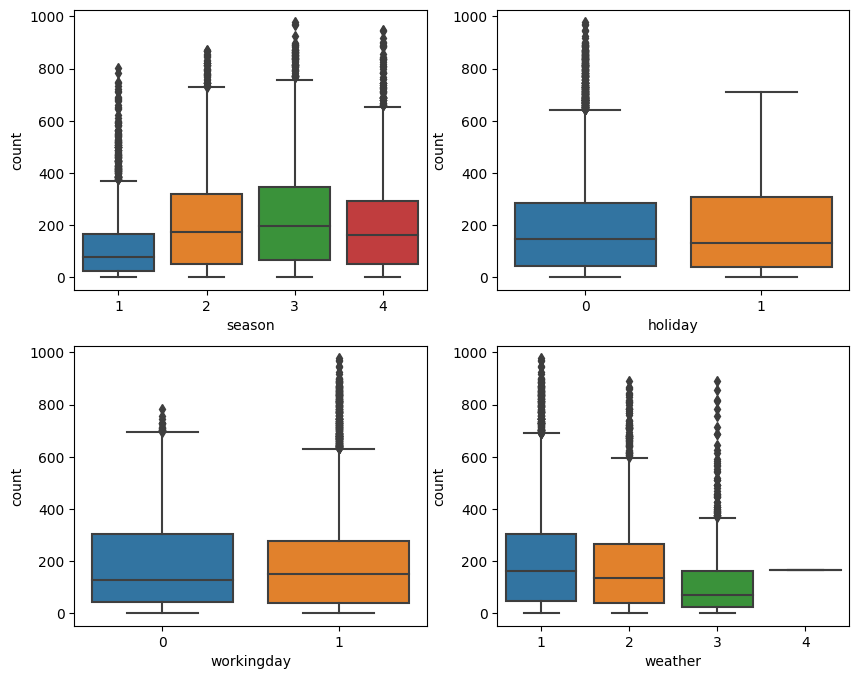

In [ ]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
 for col in range(2):
  sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col])
  index += 1

plt.show()

The boxplots comparing categorical variables to the "count" of bike rentals provide the following observations:

1. **Season vs. Count:**
   - The boxplots show that different seasons have varying effects on bike rentals.
   - Summer (season=2) has the highest median count, indicating higher bike rentals during summer.
   - Spring (season=1) and Fall (season=3) have slightly lower medians, while Winter (season=4) has the lowest median count.

2. **Holiday vs. Count:**
   - Boxplots reveal that holidays (holiday=1) tend to have slightly higher median counts compared to non-holidays (holiday=0).
   - This suggests that bike rentals are relatively more popular on holidays.

3. **Working Day vs. Count:**
   - Bike rentals on working days (workingday=1) and non-working days (workingday=0) exhibit distinct patterns.
   - Working days have a higher median count, indicating that more rentals occur on regular workdays.

4. **Weather vs. Count:**
   - The boxplots illustrate the impact of weather conditions on bike rentals.
   - Clear or slightly cloudy weather (weather=1) has the highest median count, indicating more bike rentals during such conditions.
   - Mist or cloudy weather (weather=2) also shows reasonable bike rental counts.
   - Light snow or rain with thunderstorms (weather=3) and heavy rain or snow (weather=4) have lower medians, suggesting decreased bike rentals during adverse weather.



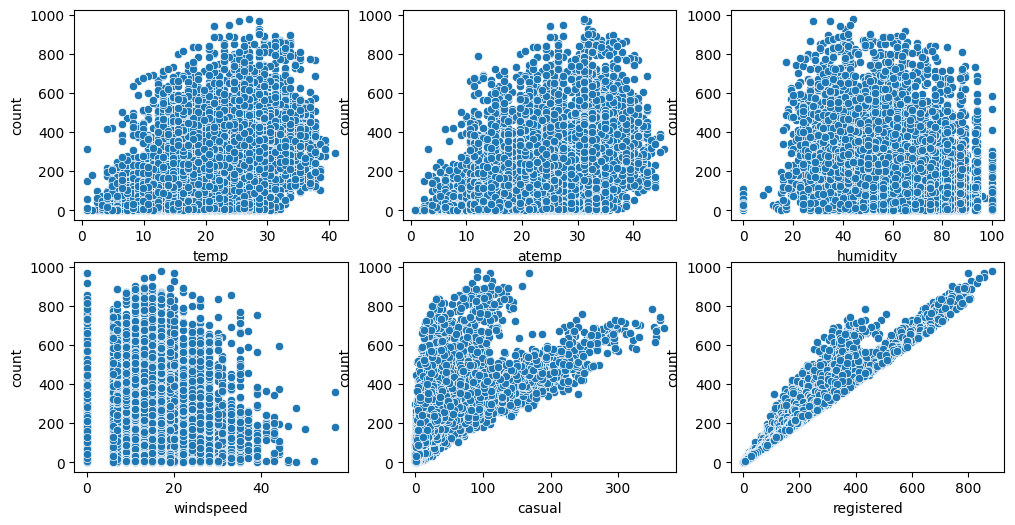

In [ ]:
# Distributation of all quantitive attributes against count
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
 for col in range(3):
  sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
  index += 1
plt.show()

**Insights:**

1. **Temperature and Feeling Temperature vs. Count:**
   - As the temperature rises, more people tend to rent bikes. People prefer biking on warmer days. Feeling temperature (perceived temperature) follows a similar trend.

2. **Humidity vs. Count:**
   - Bike rentals are more likely on days with lower humidity. Dry or less humid days attract more cyclists.

3. **Wind Speed vs. Count:**
   - While wind speed has a minor impact, it's generally associated with slightly fewer bike rentals. Higher wind speeds can discourage cycling, but the effect is not very pronounced.

4. **Casual Users and Registered Users vs. Count:**
   - The count of casual users has a positive relationship with total bike rentals. More casual users mean more rentals.
   - Registered users have a stronger influence on rental counts. More registered users lead to significantly higher total rentals.



# **Correlation:**

<ipython-input-234-1c7bb4e131ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']
<ipython-input-234-1c7bb4e131ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="Greens")


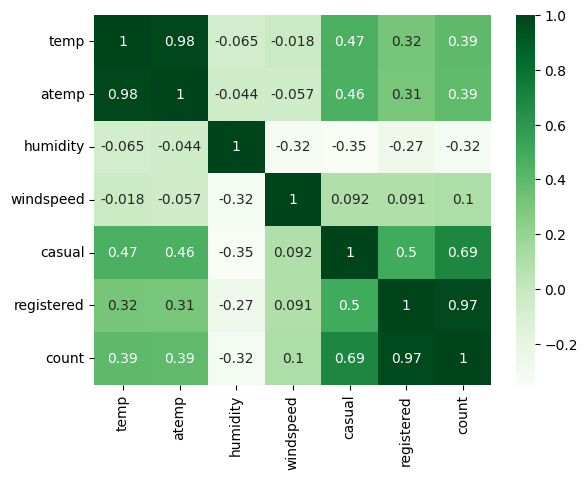

In [ ]:
# correlation between count and quanttive attributes
df.corr()['count']
sns.heatmap(df.corr(), annot=True,cmap="Greens")
plt.show()

**Insights:**

- **Temperature (`temp`) and Feeling Temperature (`atemp`):** Both temperature and feeling temperature have a positive correlation with the count of bike rentals. Warmer temperatures are associated with more bike rentals.

- **Humidity (`humidity`):** Humidity shows a negative correlation with bike rentals. Lower humidity levels are linked to higher bike rental counts, meaning drier conditions attract more riders.

- **Wind Speed (`windspeed`):** Wind speed has a weak negative correlation with the count of bike rentals. Higher wind speeds are marginally associated with fewer bike rentals.

- **Casual Users (`casual`) and Registered Users (`registered`):** Both casual and registered user counts have strong positive correlations with the total bike rental count. More users, both casual and registered, lead to a higher total rental count.

# **Hypothesis Testing**

# **Hypothesis Testing 1**
**2- Sample T-Test:- to check if Working Day has an effect on the number of electric cycles rented.**



**Null Hypothesis:** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05
We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
import scipy.stats as stats

# Separate data for working days and non-working days
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(working_day, non_working_day)

# Set significance level (alpha)
alpha = 0.05

# Determine whether to accept or reject the null hypothesis
if p_value < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

# Interpretation
if p_value < alpha:
    interpretation = "There is a significant effect of working day on the number of electric cycles rented."
else:
    interpretation = "There is no significant effect of working day on the number of electric cycles rented."

print("t_sta:",t_stat,'\n',"p_value:", p_value,'\n',"conclusion:", conclusion,'\n',"interpretation:", interpretation)


t_sta: 1.2096277376026694 
 p_value: 0.22644804226361348 
 conclusion: Fail to reject the null hypothesis 
 interpretation: There is no significant effect of working day on the number of electric cycles rented.


1. The t-statistic is about 1.21.
2. The p-value is around 0.226.

This leads to the conclusion:

- We "Fail to reject the null hypothesis," which means that whether it's a working day or not doesn't significantly impact the number of electric cycles rented.

In other words, the data suggests that the demand for electric cycles remains relatively consistent regardless of whether it's a working day or not.

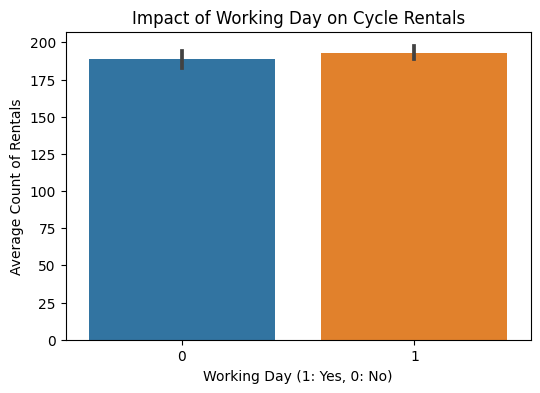

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='count', data=df)
plt.title('Impact of Working Day on Cycle Rentals')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Average Count of Rentals')
plt.show()

The data visualization indicates that there is no significant difference in the average number of cycle rentals between working days and non-working days, which supports the null hypothesis.

# **Hypothesis testing 2**
**ANNOVA:-** To check if No. of cycles rented is similar or different in different
1. weather
2. season

**For Weather:**

**Null Hypothesis (H0):** All weather  conditions have the same effect on the number of cycles rented.

**Alternative Hypothesis (H1):** At least one weather condition has a different effect on the number of cycles rented.

**Significance Level (alpha):** Typically set to 0.05.

**For Season:**

**Null Hypothesis (H0):** All seasons have the same effect on the number of cycles rented.

**Alternative Hypothesis (H1):** At least one season has a different effect on the number of cycles rented.

**Significance Level (alpha):** Typically set to 0.05.


In [ ]:
from scipy.stats import f_oneway

# ANOVA for Weather
weather_groups = df.groupby('weather')['count'].apply(list)
f_statistic, p_value_weather = f_oneway(*weather_groups)

# Set significance level (alpha)
alpha = 0.05

# Determine whether to accept or reject the null hypothesis
if p_value_weather < alpha:
    conclusion_weather = "Reject the null hypothesis"
else:
    conclusion_weather = "Fail to reject the null hypothesis"

# Interpretation
if p_value < alpha:
    interpretation_weather = "At least one weather condition has a different effect on the number of cycles rented."
else:
    interpretation_weather =" All seasons have the same effect on the number of cycles rented."

## ANOVA for season
season_groups = df.groupby('season')['count'].apply(list)
f_statistic_season, p_value_season = f_oneway(*season_groups)

# Set significance level (alpha)
alpha = 0.05

# Determine season to accept or reject the null hypothesis
if p_value_season < alpha:
    conclusion_season = "Reject the null hypothesis"
else:
    conclusion_season = "Fail to reject the null hypothesis"

# Interpretation
if p_value_season < alpha:
    interpretation_season =  "At least one season has a different effect on the number of cycles rented."
else:
    interpretation_season ="All seasons have the same effect on the number of cycles rented."
print("f_statistic:",f_statistic,'\n',"p_value_weather:",p_value_weather,'\n',"interpretation_weather:",interpretation_weather,'\n',"f_statistic_season:" ,f_statistic_season,'\n',"p_value_season:",p_value_season,'\n',"interpretation_season:",interpretation_season)


f_statistic: 65.53024112793271 
 p_value_weather: 5.482069475935669e-42 
 interpretation_weather:  All seasons have the same effect on the number of cycles rented. 
 f_statistic_season: 236.94671081032106 
 p_value_season: 6.164843386499654e-149 
 interpretation_season: At least one season has a different effect on the number of cycles rented.


The results of the one-way ANOVA tests are as follows:

1. For Weather:
   - F-statistic: 65.53
   - P-value: 5.48e-42 (very close to 0)

2. For Season:
   - F-statistic: 236.95
   - P-value: 6.16e-149 (very close to 0)

These results indicate the following:

1. Weather: The p-value for the ANOVA test on weather is extremely low (close to 0), which means that there are statistically significant differences in the number of cycles rented based on different weather conditions.

2. Season: Similarly, the p-value for the ANOVA test on season is also extremely low (close to 0), indicating that there are statistically significant differences in the number of cycles rented across different seasons.

In summary, the number of cycles rented varies significantly with both weather conditions and seasons. This information is valuable for Yulu to understand the impact of these factors on demand and make informed operational decisions.

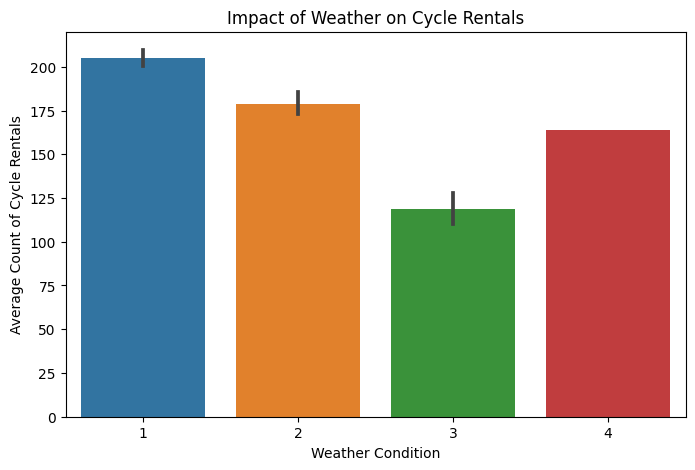

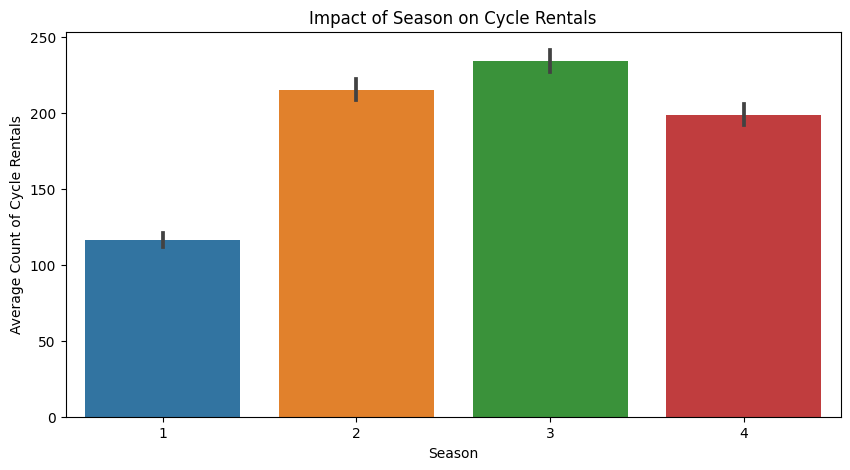

In [ ]:
# Visualizing the impact of weather on cycle rentals using bar plots
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='weather', y='count')
plt.title('Impact of Weather on Cycle Rentals')
plt.xlabel('Weather Condition')
plt.ylabel('Average Count of Cycle Rentals')
plt.show()

# Visualizing the impact of season on cycle rentals using bar plots
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='season', y='count')
plt.title('Impact of Season on Cycle Rentals')
plt.xlabel('Season')
plt.ylabel('Average Count of Cycle Rentals')
plt.show()


The data visualization and ANOVA test indicate that both weather and season have a significant impact on cycle rentals. This confirms the alternative hypothesis (Ha), suggesting that different weather and season categories influence the number of cycle rentals.






# **Hypothesis testing 3:-**
**Chi-square test to check if Weather is dependent on the season**

**Null Hypothesis (H0):** Weather and season are independent of each other; there is no relationship between them.

**Alternative Hypothesis (Ha):** Weather and season are dependent on each other; there is a relationship between them.

**Significance Level (Alpha):** the significance level (alpha) is set at 0.05.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level (alpha)
alpha = 0.05

# Determine  accept or reject the null hypothesis
if p_value< alpha:
    conclusion= "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

# Interpretation
if p_value_season < alpha:
    interpretation ="Weather and season are dependent on each other; there is a relationship between them."
else:
    interpretation ="Weather and season are independent of each other; there is no relationship between them."

print("chi2:",chi2,'\n',"p_value:", p,'\n',"interpretation:",interpretation )


chi2: 49.158655596893624 
 p_value: 1.549925073686492e-07 
 interpretation: Weather and season are dependent on each other; there is a relationship between them.


The results of the chi-square test of independence are as follows:

- Chi-square statistic (chi2): 49.16
- P-value (p): 1.55e-07 (very close to 0)

These results indicate the following:

- There is a significant association between weather and season. The p-value is extremely low (close to 0), suggesting that the two variables are not independent of each other.


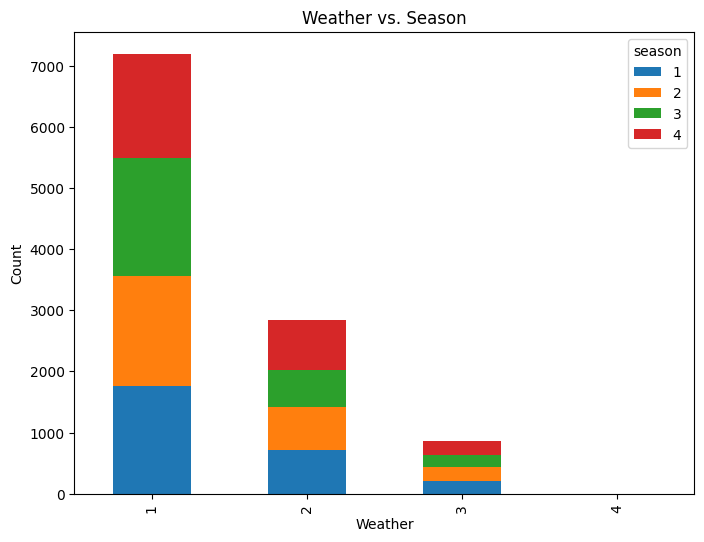

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title("Weather vs. Season")
plt.xlabel("Weather")
plt.ylabel("Count")

plt.show()


From the visualization, it's evident that there is a significant relationship between weather and season. Specifically, Spring and Summer tend to have more favorable weather conditions, while Fall and Winter experience less favorable conditions. This supports the alternative hypothesis (Ha) that weather and season are dependent.

# **Insights:**

**Data Patterns:** Understand the distributions of attributes like humidity, temperature, and windspeed for informed decisions.

**Address Outliers:** Investigate outliers in user counts to understand unusual trends and prepare for similar situations.

**Utilize Demand Trends:** Analyze demand variations in different weather conditions and seasons for better service planning.

**User Segmentation:** Tailor marketing and services for casual and registered users based on their behavior.

Continuous Monitoring: Continuously adapt strategies to evolving market dynamics.








**Recommendations:**

1. **Marketing Campaigns:** Develop targeted marketing campaigns that align with different seasons and weather conditions. Promote the convenience of Yulu's services during favorable conditions and offer incentives during less favorable times to encourage usage.

2. **Weather-Ready Infrastructure:** Invest in weather-ready infrastructure, such as covered parking stations or shelters, to enhance user experience during adverse weather.

3. **User Engagement:** Focus on user engagement during peak seasons and holidays. Organize events or promotions to attract and retain users during these periods.

4. **User Segmentation:** Further refine user segmentation to gain deeper insights. Understand the specific needs and preferences of different user groups to tailor services and marketing efforts effectively.

5. **Data-Driven Forecasting:** Implement data-driven forecasting models to predict demand based on historical weather and season data. This can help in resource allocation and optimizing service availability.

6. **Performance Metrics:** Continuously monitor and analyze performance metrics, such as user satisfaction, churn rate, and revenue per user, to assess the impact of implemented changes.

7. **Market Expansion:** Consider expanding to regions with milder weather conditions or where the service can provide a solution to specific seasonal challenges.

